In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('newmeta.csv', low_memory=False)

In [4]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    for col in ['abstract']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

data = clean_dataframe(data)
data.head(5)

,abstract,publish_time
0,objective retrospective chart review describes...,2001-07-04
1,inflammatory diseases respiratory tract common...,2000-08-15
2,surfactant proteind spd participates innate re...,2000-08-25
3,endothelin1 et1 21 amino acid peptide diverse ...,2001-02-22
4,respiratory syncytial virus rsv pneumonia viru...,2001-05-11


In [6]:
data.to_csv('processed.csv', index=False)

In [7]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['abstract']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:2]

[['objective',
  'retrospective',
  'chart',
  'review',
  'describes',
  'epidemiology',
  'clinical',
  'features',
  '40',
  'patients',
  'cultureproven',
  'mycoplasma',
  'pneumoniae',
  'infections',
  'king',
  'abdulaziz',
  'university',
  'hospital',
  'jeddah',
  'saudi',
  'arabia',
  'methods',
  'patients',
  'positive',
  'pneumoniae',
  'cultures',
  'respiratory',
  'specimens',
  'january',
  '1997',
  'december',
  '1998',
  'identified',
  'microbiology',
  'records',
  'charts',
  'patients',
  'reviewed',
  'results',
  '40',
  'patients',
  'identified',
  '33',
  '825',
  'required',
  'admission',
  'infections',
  '925',
  'communityacquired',
  'infection',
  'affected',
  'age',
  'groups',
  'common',
  'infants',
  '325',
  'preschool',
  'children',
  '225',
  'occurred',
  'yearround',
  'common',
  'fall',
  '35',
  'spring',
  '30',
  'threequarters',
  'patients',
  '775',
  'comorbidities',
  'twentyfour',
  'isolates',
  '60',
  'associated',
  'pn

In [20]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig(fname='model.png', format='png')
    plt.show()
   

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


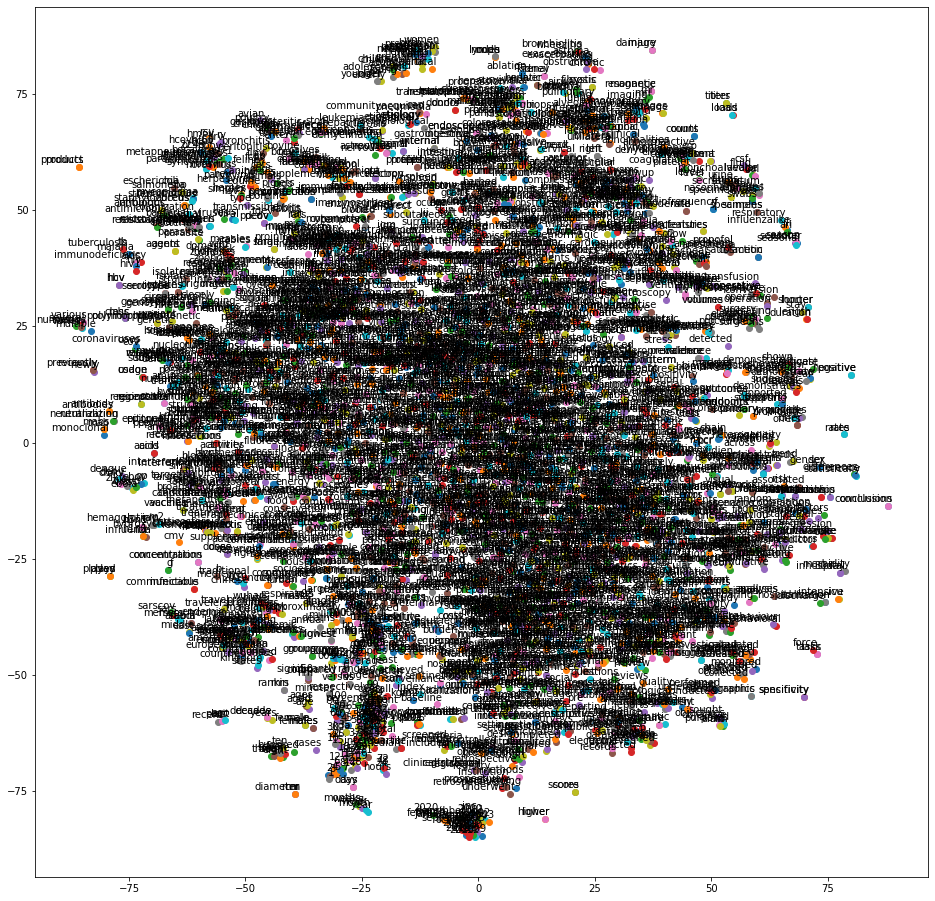

In [12]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


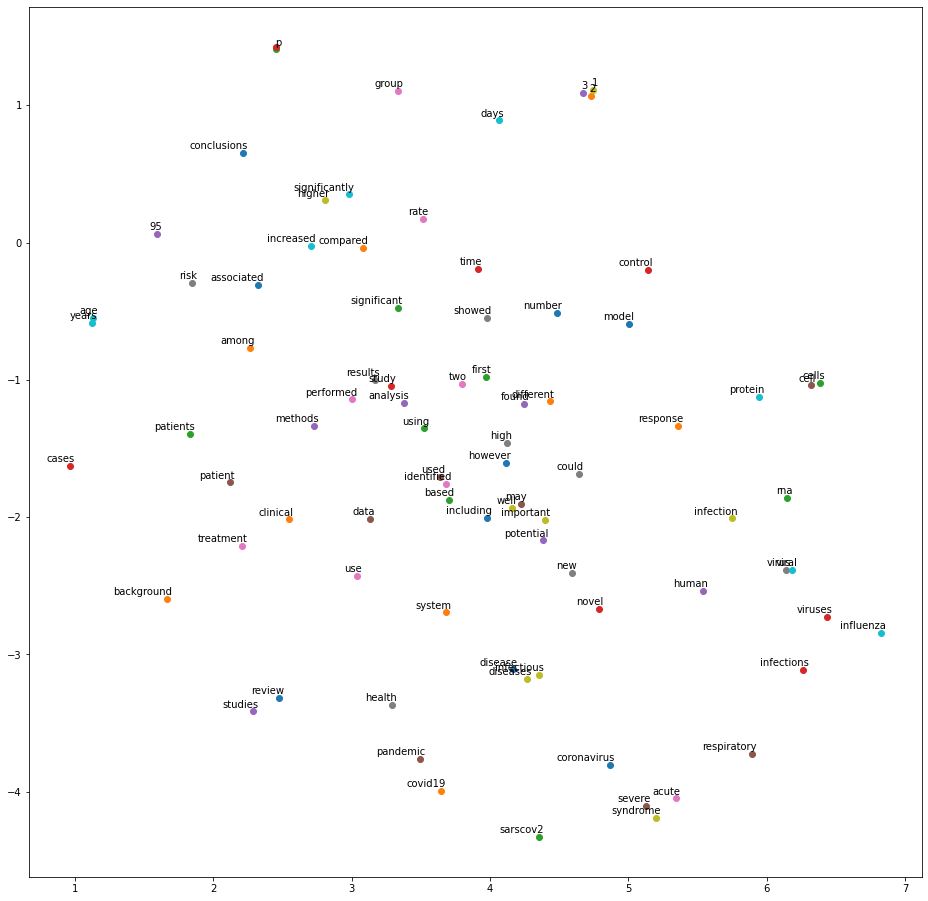

In [16]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=15000, workers=4)
tsne_plot(model)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


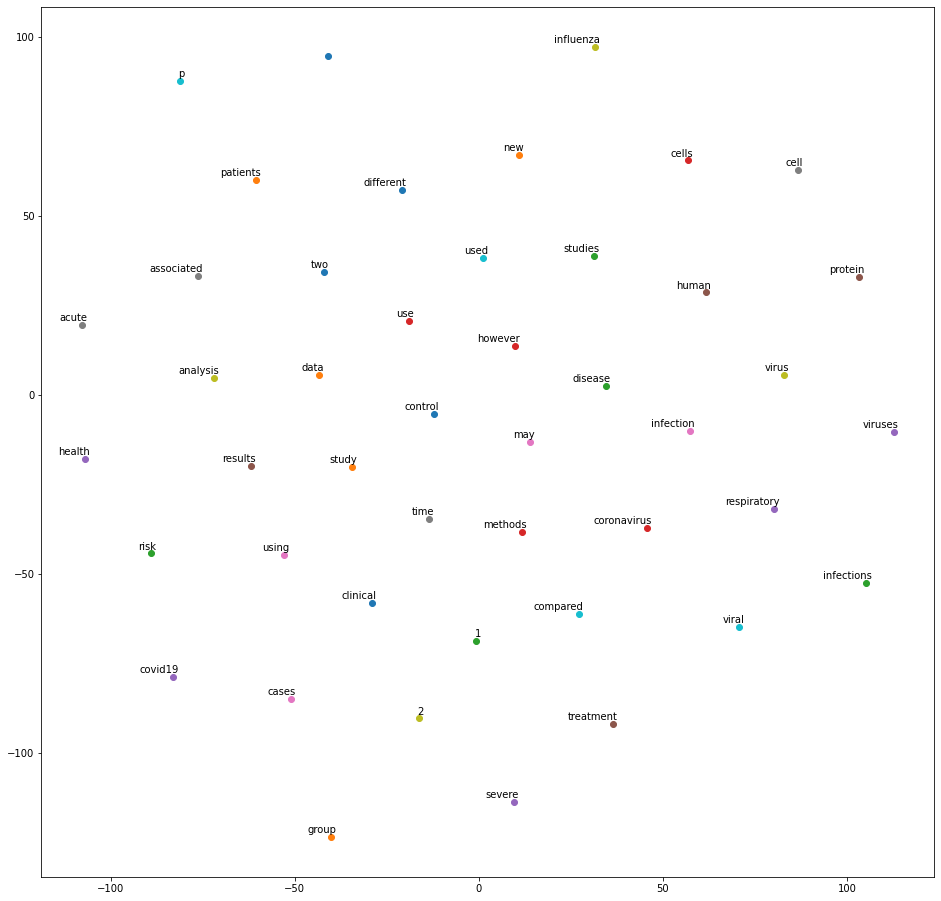

In [21]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=20000, workers=4)
tsne_plot(model)